<a href="https://colab.research.google.com/github/Jawad-repo/Urdu_WordCloud_Steming_StopWordRemoval/blob/main/Urdu_WordCloud_Steaming__StopWordRemoval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [274]:
import pandas as pd

In [275]:
#Get the dataset from git repo

url_data = (r'https://raw.githubusercontent.com/Jawad-repo/Model_Training_Multilingual_Fake_News_Detection/main/Combined.csv')
df = pd.read_csv(url_data)

In [276]:
df_TrueFakeNews = df
#df_TrueFakeNews.head(15)

In [277]:
df_FakeNews = df_TrueFakeNews[df_TrueFakeNews["Label"] == "FAKE"]
df_FakeNews.head(15)

,Sr_No.,News_Items,Label
0,1,ٹی ٹی پی نے پنجاب حکومت کے ہیلی کاپٹر کے عملے ...,FAKE
1,2,مارک زکربرگ سیاست میں آنے کا سوچ رہے ہیں۔,FAKE
2,3,فریدہ جلال نے اپنی موت کی افواہوں پر تنقید کی۔,FAKE
3,4,جعلی خبریں: پاپ اسٹار حدیقہ کیانی نے جعلی منشی...,FAKE
4,5,صنم ماروی نے میڈیا پر گردش کرنے والی زیادتی او...,FAKE
5,6,نواز شریف نے واقعی کرپشن کی وجہ سے ڈیووس میں ت...,FAKE
6,7,پی ایف اے کی ’آئرن لیڈی‘ عائشہ ممتاز کا ویڈیو-...,FAKE
7,8,CPEC کے بارے میں خطرناک افواہیں,FAKE
8,9,امریکہ نے القاعدہ کی جعلی ویڈیوز بنانے پر کروڑ...,FAKE
9,10,پاکستان کا جعلی پروگرام نشر کرنے پر بھارتی چین...,FAKE


In [278]:
df_RealNews= df_TrueFakeNews[df_TrueFakeNews["Label"] == "TRUE"]
df_RealNews.head(15)

,Sr_No.,News_Items,Label
5054,1,دہلی میں جلد ہی 24×7 مال، تجارتی علاقوں میں کھ...,TRUE
5055,2,بی جے پی مسلسل ہاردک پٹیل کو ہراساں کر رہی ہے:...,TRUE
5056,3,کیرالہ اور پنجاب کے بعد مہاراشٹرا بھی سی اے اے...,TRUE
5057,4,AAP کے جگدیپ سنگھ نے دہلی انتخابات میں ٹکٹ نہ ...,TRUE
5058,5,یوپی کے سی ایم یوگی آدتیہ ناتھ کے قریبی ساتھی ...,TRUE
5059,6,مودی حکومت کے وزراء کشمیری سیاست دانوں سے مل س...,TRUE
5060,7,سی اے اے کی مخالفت کرنے والے دانشور شیطان اور ...,TRUE
5061,8,ہماچل پردیش کے سابق وزیر راجیو بندل کو ریاستی ...,TRUE
5062,9,بی جے پی نئی دہلی سیٹ سے اروند کیجریوال سے مقا...,TRUE
5063,10,بی جے پی اور پون کلیان نے اتحاد کا اعلان کیا، ...,TRUE


In [279]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0, 0.5, '# of News Articles')

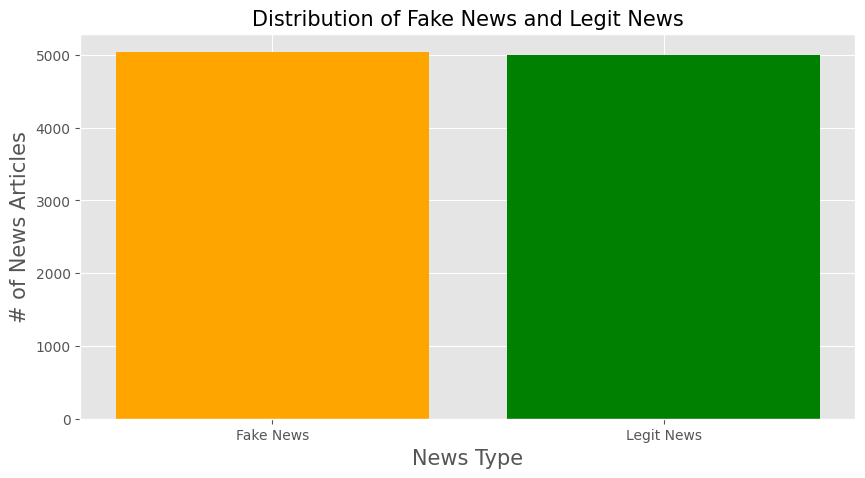

In [280]:
plt.figure(figsize=(10, 5))
plt.title('Distribution of Fake News and Legit News', size=15)

plt.bar('Fake News', len(df_FakeNews), color='orange')
plt.bar('Legit News', len(df_RealNews), color='green')

#X-Axis
plt.xlabel('News Type', size=15)
#Y-Axis
plt.ylabel('# of News Articles', size=15)

In [281]:
all_words_LegitNews = ' '.join([text for text in df_RealNews.News_Items])
len(all_words_LegitNews)

861337

In [282]:
all_words_FakeNews = ' '.join([text for text in df_FakeNews.News_Items])
len(all_words_FakeNews)

2674265

In [283]:

# Manually define Urdu stop words
urdu_stop_words = {"تھا؟","تھا۔","ہیں،","؟","گے؟",",","ہے؟","۔","!","تھا","تھا","ہیں","ہے","ہے۔","کیا","آپکے", "آپکا", "آپکو", "ہاں", "ہوں", "ہوگا", "ہوگی", "ہوگے", "ت", "و", "کہیں", "وغیرہ",
    "ا", "ان", "انکے", "انکی", "انکو", "انہوں", "انہیں", "اور", "ایسے", "ب", "بہت", "تاکہ", "تھا",
    "تھی", "تھے", "تھیں", "جب", "جبکہ", "جو", "حالانکہ", "خواہ", "خود", "دو", "دی", "دیا", "دیتے",
    "دیکھا", "دیکھو", "دیں", "رہا", "رہی", "رہے", "رہیں", "رہے", "ساتھ", "سب", "سبھی", "سو", "سے",
    "شاید", "صرف", "ضرور", "ضرورت", "ضروری", "طرح", "طرف", "طور", "علاوہ", "عین", "غیر", "لیکن", "مگر",
    "میں", "نہ", "نہیں", "والا", "والوں", "والی", "والیں", "والے", "وغیرہ", "وہ", "وہاں", "وہی", "وہیں",
    "پ", "پر", "پوری", "پھر", "چاہئے", "چاہتے", "چاہیے", "چاہیں", "چونکہ", "چکی", "چکے", "چکیں", "چکے",
    "چنانچہ", "چند", "چکی", "چکے", "کر", "کرتا", "کرتی", "کرتے", "کرتی", "کرتے", "کرنا", "کرنے", "کرنی",
    "کرنے", "کرنی", "کرنے", "کرنیں", "کرنے", "کرنیں", "کرنے", "کرنیں", "کرے", "کریں", "کم", "کس", "کسی",
    "کسے", "کی", "کیسے", "کیونکہ", "کے", "گئی", "گئے", "گئیں", "گئے", "گا", "گائیں", "گرم", "گریبان", "گریبانیں",
    "گی", "گیا", "گیں", "ہر", "ہم", "ہمیں", "ہو", "ہوئی", "ہوئیں", "ہوئے", "ہوئیں", "ہوتا", "ہوتی", "ہوتے",
    "ہوتی", "ہوتے", "ہونا", "ہونگے", "ہونگی", "ہونگے", "ہونی", "ہونیں", "ہونے", "ہونیں", "ہوں", "ہوگا", "ہوگی",
    "ہوگا", "ہوگی", "ہوگے", "ہوگیں", "یا", "یہ", "یہاں", "یہی", "یہیں", "یہے","اب","ابھی","اپنا","اپنے","اپنی",
    "اٹھا","اس","اسے","اسی","اگر","ان","انہوں","انہی","انہیں","انھیں","او","اور","اے","ایسا","ایسے","ایسی","ایک",
    "آ","آپ","آتا","آتے","آتی","آگے","آنا","آنے","آنی","آئے","آئی","آئیں","آیا","با","بڑا","بڑے","بڑی","بعد","بعض",
    "بلکہ","بہت","بھی","بے","پاس","پر","پہلے","پھر","تا","تاکہ","تب","تجھ","تجھے","تک","تم","تمام","تمہارا","تمہارے",
    "تمھارے","تمہاری","تمہیں","تمھیں","تھا","تھے","تھی","تھیں","تو","تیری","تیرے","جا","جاتا","جاتی","جاتے","جاتی","جانے",
    "جانی","جاؤ","جائے","جائیں","جب","جس","جن","جنہوں","جنہیں","جو","جیسا","جیسے","جیسی","جیسوں","چاہیئے","چلا","چاہے","چونکہ",
    "حالاں","حالانکہ","دو","دونوں","دوں","دے","دی","دیا","دیں","دیے","دیتا","دیتے","دیتی","دینا","دینے","دینی","دیئے","ڈالا","ڈالنا",
    "ڈالنے","ڈالنی","ڈالے","ڈالی","ذرا","رکھا","رکھتا","رکھتے","رکھتی","رکھنا","رکھنے","رکھنی","رکھے","رکھی","رہ","رہا","رہتا","رہتے",
    "رہتی","رہنا","رہنے","رہنی","رہو","رہے","رہی","رہیں","زیادہ","سا","سامنے","سب","سکتا","سو","سے","سی","شاید","صرف","طرح","طرف","عین",
    "کا","کبھی","کچھ","کہہ","کر","کرتا","کرتے","کرتی","کرنا","کرنے","کرو","کروں","کرے","کریں","کس","کسے","کسی","کہ","کہا","کہے","کو","کون",
    "کوئی","کے","کی","کیا","کیسے","کیوں","کیونکہ","کیے","کئے","گا","گویا","گے","گی","گیا","گئے","گئی","لا","لاتا","لاتے","لاتی","لانا","لانے","لانی",
    "لایا","لائے","لائی","لگا","لگے","لگی","لگیں","لو","لے","لی","لیا","لیتا","لیتے","لیتی","لیکن","لیں","لیے","لئے","مجھ","مجھے","مگر","میرا",
    "میرے","میری","میں","نا","نہ","نہایت","نہیں","نے","ہاں","ہر","ہم","ہمارا","ہمارے","ہماری","ہو","ہوا","ہوتا","ہوتے","ہوتی","ہوتیں","ہوں",
    "ہونا","ہونگے","ہونے","ہونی","ہوئے","ہوئی","ہوئیں","ہے","ہی","ہیں","و","والا","والوں","والے","والی","وہ","وہاں","وہی","وہیں","یا","یعنی",
    "یہ","یہاں","یہی","یہیں"
}

In [284]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import string


# Initialize a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Tokenize the text
tokens = word_tokenize(all_words_FakeNews)

#-----------------------------------------------
# Define a function to remove concatenated punctuation marks from a token
def remove_punctuation(token):
    cleaned_token = ''.join(char for char in token if char not in '-،؛؟۔٪ء!,.:;')
    return cleaned_token

# Remove punctuation marks from each token in the list
tokens = [remove_punctuation(token) for token in tokens]
#-----------------------------------------------------------

# Remove stop words and lemmatize tokens
cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in urdu_stop_words]

# Join the tokens back into text
cleaned_text = ' '.join(cleaned_tokens)

all_words_FakeNews=cleaned_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [285]:
# to disply only a word from tokens
import re
pattern = r'\bتھا\b'  # Using \b to match the whole word "تھا"

# Find all tokens matching the pattern
matched_tokens = [token for token in cleaned_tokens if re.search(pattern, token)]

# Display the matched tokens
print(matched_tokens)

['تھا…']


In [286]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import string


# Initialize a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Tokenize the text
tokens = word_tokenize(all_words_LegitNews)

#-----------------------------------------------
# Define a function to remove concatenated punctuation marks from a token
def remove_punctuation(token):
    cleaned_token = ''.join(char for char in token if char not in '-،؛؟۔٪ء!,.:;')
    return cleaned_token

# Remove punctuation marks from each token in the list
tokens = [remove_punctuation(token) for token in tokens]
#-----------------------------------------------------------

# Remove stop words and lemmatize tokens
cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in urdu_stop_words]

# Join the tokens back into text
cleaned_text = ' '.join(cleaned_tokens)

all_words_LegitNews=cleaned_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [287]:
import os

font_path = '/content/NotoNaskhArabic-Regular.ttf'
if not os.path.exists(font_path):
  !wget https://github.com/Jawad-repo/Model_Training_Multilingual_Fake_News_Detection/blob/main/NotoNaskhArabic-Regular.ttf #-O $font_path

  ##The downloaded filed would not word pls download the file from the link and manually place it to you directory

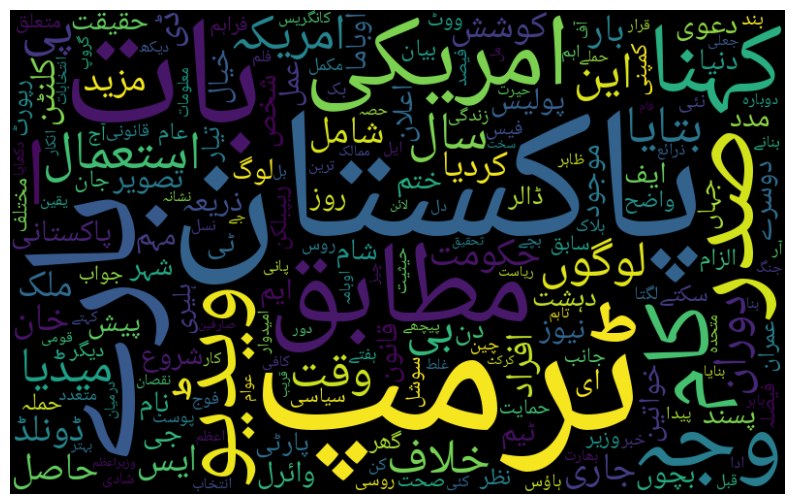

In [288]:
# Word cloud for fake news
from wordcloud import WordCloud

# Font_Url = (r'https://github.com/Jawad-repo/Model_Training_Multilingual_Fake_News_Detection/blob/main/NotoNaskhArabic-Regular.ttf')

wordcloud = WordCloud(width= 800, height= 500,
                          font_path='NotoNaskhArabic-Regular.ttf',
                          max_font_size = 210,
                          collocations = False).generate(all_words_FakeNews)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

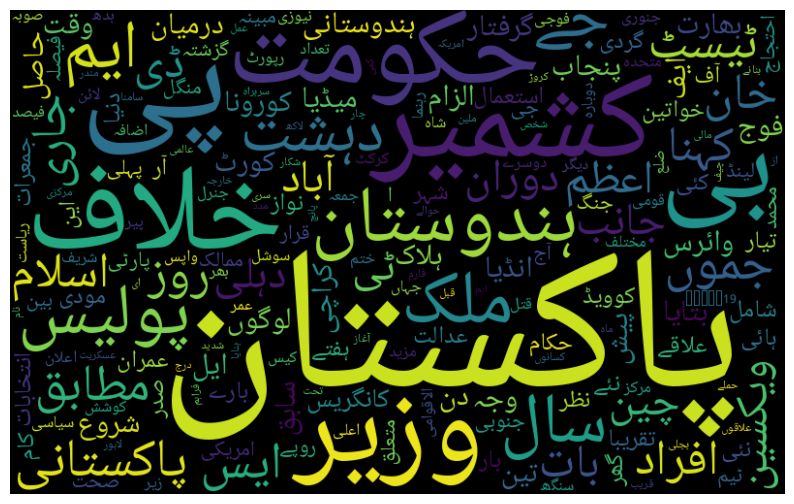

In [289]:
# Word cloud for fake news
from wordcloud import WordCloud

# Font_Url = (r'https://github.com/Jawad-repo/Model_Training_Multilingual_Fake_News_Detection/blob/main/NotoNaskhArabic-Regular.ttf')

wordcloud = WordCloud(width= 800, height= 500,
                          font_path='NotoNaskhArabic-Regular.ttf',
                          max_font_size = 210,
                          collocations = False).generate(all_words_LegitNews)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()